## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  60.364815  1034.347936  0.938721   2.290293  1.630273
1  12.508393   298.571878  0.816531  10.585028  1.561064
2  82.093663   433.047176  0.769317   3.191764  1.253807
3  62.510056   422.785543  0.887444   7.876916  1.369705
4  78.702258  1635.437034  0.922940   9.878268  1.331627


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0086464	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.9974911	total: 69.3ms	remaining: 34.6s
2:	learn: 0.9879567	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9789021	total: 70.2ms	remaining: 17.5s
4:	learn: 0.9688547	total: 70.7ms	remaining: 14.1s
5:	learn: 0.9597990	total: 71.1ms	remaining: 11.8s
6:	learn: 0.9478058	total: 71.5ms	remaining: 10.1s
7:	learn: 0.9382009	total: 71.9ms	remaining: 8.91s
8:	learn: 0.9283906	total: 72.3ms	remaining: 7.96s
9:	learn: 0.9174056	total: 72.7ms	remaining: 7.2s
10:	learn: 0.9090817	total: 73.1ms	remaining: 6.57s
11:	learn: 0.9002804	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8918784	total: 73.9ms	remaining: 5.61s
13:	learn: 0.8834544	total: 74.3ms	remaining: 5.23s
14:	learn: 0.8718565	total: 74.8ms	remaining: 4.91s
15:	learn: 0.8644155	total: 75.3ms	remaining: 4.63s
16:	learn: 0.8572358	total: 75.6ms	remaining: 4.37s
17:	learn: 0.8485701	total: 76ms	remaining: 4.15s
18:	learn: 0.8406393	total: 76.4ms	remaining: 3

89:	learn: 0.4616119	total: 108ms	remaining: 1.09s
90:	learn: 0.4583831	total: 108ms	remaining: 1.08s
91:	learn: 0.4557448	total: 109ms	remaining: 1.07s
92:	learn: 0.4527991	total: 109ms	remaining: 1.06s
93:	learn: 0.4496458	total: 109ms	remaining: 1.05s
94:	learn: 0.4463252	total: 110ms	remaining: 1.05s
95:	learn: 0.4433052	total: 110ms	remaining: 1.04s
96:	learn: 0.4410977	total: 111ms	remaining: 1.03s
97:	learn: 0.4385187	total: 111ms	remaining: 1.02s
98:	learn: 0.4359080	total: 112ms	remaining: 1.01s
99:	learn: 0.4337247	total: 112ms	remaining: 1.01s
100:	learn: 0.4305701	total: 112ms	remaining: 1s
101:	learn: 0.4274501	total: 113ms	remaining: 995ms
102:	learn: 0.4253620	total: 113ms	remaining: 987ms
103:	learn: 0.4230791	total: 114ms	remaining: 980ms
104:	learn: 0.4206599	total: 114ms	remaining: 972ms
105:	learn: 0.4171788	total: 115ms	remaining: 966ms
106:	learn: 0.4141355	total: 115ms	remaining: 958ms
107:	learn: 0.4106302	total: 115ms	remaining: 952ms
108:	learn: 0.4078447	tota

277:	learn: 0.1927800	total: 186ms	remaining: 484ms
278:	learn: 0.1921745	total: 187ms	remaining: 483ms
279:	learn: 0.1918862	total: 188ms	remaining: 484ms
280:	learn: 0.1914295	total: 188ms	remaining: 482ms
281:	learn: 0.1909188	total: 189ms	remaining: 481ms
282:	learn: 0.1903908	total: 189ms	remaining: 480ms
283:	learn: 0.1890930	total: 190ms	remaining: 478ms
284:	learn: 0.1885106	total: 190ms	remaining: 477ms
285:	learn: 0.1882027	total: 191ms	remaining: 476ms
286:	learn: 0.1876472	total: 191ms	remaining: 474ms
287:	learn: 0.1873453	total: 191ms	remaining: 473ms
288:	learn: 0.1868879	total: 192ms	remaining: 472ms
289:	learn: 0.1864543	total: 192ms	remaining: 471ms
290:	learn: 0.1860875	total: 193ms	remaining: 470ms
291:	learn: 0.1851776	total: 193ms	remaining: 468ms
292:	learn: 0.1848397	total: 194ms	remaining: 467ms
293:	learn: 0.1841487	total: 194ms	remaining: 466ms
294:	learn: 0.1832076	total: 194ms	remaining: 465ms
295:	learn: 0.1828639	total: 195ms	remaining: 463ms
296:	learn: 

511:	learn: 0.0898279	total: 290ms	remaining: 276ms
512:	learn: 0.0896230	total: 290ms	remaining: 275ms
513:	learn: 0.0893941	total: 291ms	remaining: 275ms
514:	learn: 0.0890900	total: 291ms	remaining: 274ms
515:	learn: 0.0888657	total: 291ms	remaining: 273ms
516:	learn: 0.0886172	total: 292ms	remaining: 273ms
517:	learn: 0.0883862	total: 292ms	remaining: 272ms
518:	learn: 0.0881603	total: 293ms	remaining: 271ms
519:	learn: 0.0879396	total: 293ms	remaining: 271ms
520:	learn: 0.0877918	total: 294ms	remaining: 270ms
521:	learn: 0.0875756	total: 294ms	remaining: 269ms
522:	learn: 0.0873539	total: 295ms	remaining: 269ms
523:	learn: 0.0872058	total: 295ms	remaining: 268ms
524:	learn: 0.0869934	total: 296ms	remaining: 267ms
525:	learn: 0.0867054	total: 296ms	remaining: 267ms
526:	learn: 0.0864972	total: 297ms	remaining: 266ms
527:	learn: 0.0862166	total: 297ms	remaining: 266ms
528:	learn: 0.0860127	total: 297ms	remaining: 265ms
529:	learn: 0.0857711	total: 298ms	remaining: 264ms
530:	learn: 

689:	learn: 0.0586764	total: 369ms	remaining: 166ms
690:	learn: 0.0586050	total: 370ms	remaining: 165ms
691:	learn: 0.0584545	total: 370ms	remaining: 165ms
692:	learn: 0.0583367	total: 370ms	remaining: 164ms
693:	learn: 0.0582359	total: 371ms	remaining: 164ms
694:	learn: 0.0581534	total: 371ms	remaining: 163ms
695:	learn: 0.0580461	total: 371ms	remaining: 162ms
696:	learn: 0.0577829	total: 372ms	remaining: 162ms
697:	learn: 0.0576896	total: 372ms	remaining: 161ms
698:	learn: 0.0575916	total: 373ms	remaining: 161ms
699:	learn: 0.0574992	total: 373ms	remaining: 160ms
700:	learn: 0.0574024	total: 374ms	remaining: 159ms
701:	learn: 0.0572608	total: 374ms	remaining: 159ms
702:	learn: 0.0571452	total: 375ms	remaining: 158ms
703:	learn: 0.0570509	total: 375ms	remaining: 158ms
704:	learn: 0.0569596	total: 376ms	remaining: 157ms
705:	learn: 0.0568665	total: 376ms	remaining: 157ms
706:	learn: 0.0567970	total: 377ms	remaining: 156ms
707:	learn: 0.0567052	total: 377ms	remaining: 156ms
708:	learn: 

917:	learn: 0.0345092	total: 472ms	remaining: 42.1ms
918:	learn: 0.0343763	total: 472ms	remaining: 41.6ms
919:	learn: 0.0342563	total: 472ms	remaining: 41.1ms
920:	learn: 0.0341644	total: 473ms	remaining: 40.6ms
921:	learn: 0.0340488	total: 473ms	remaining: 40ms
922:	learn: 0.0339983	total: 474ms	remaining: 39.5ms
923:	learn: 0.0339084	total: 474ms	remaining: 39ms
924:	learn: 0.0338427	total: 475ms	remaining: 38.5ms
925:	learn: 0.0337211	total: 475ms	remaining: 38ms
926:	learn: 0.0335942	total: 475ms	remaining: 37.4ms
927:	learn: 0.0335448	total: 476ms	remaining: 36.9ms
928:	learn: 0.0334643	total: 476ms	remaining: 36.4ms
929:	learn: 0.0333765	total: 476ms	remaining: 35.9ms
930:	learn: 0.0333124	total: 477ms	remaining: 35.3ms
931:	learn: 0.0332701	total: 477ms	remaining: 34.8ms
932:	learn: 0.0332070	total: 478ms	remaining: 34.3ms
933:	learn: 0.0331211	total: 478ms	remaining: 33.8ms
934:	learn: 0.0330047	total: 478ms	remaining: 33.3ms
935:	learn: 0.0329544	total: 479ms	remaining: 32.7ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

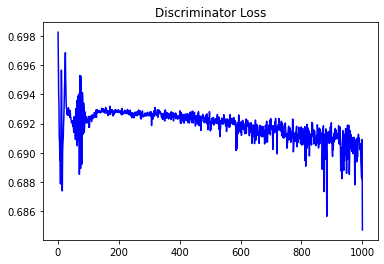

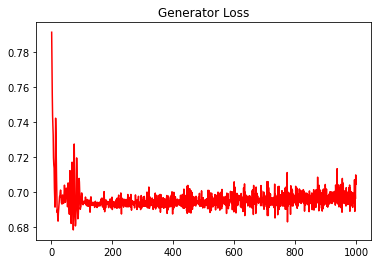

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2394148110543191


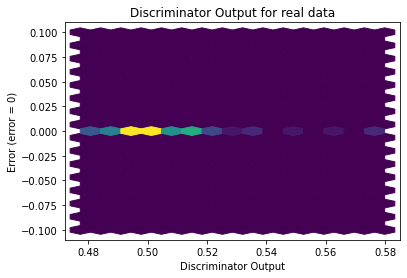

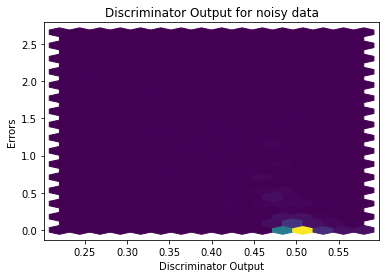

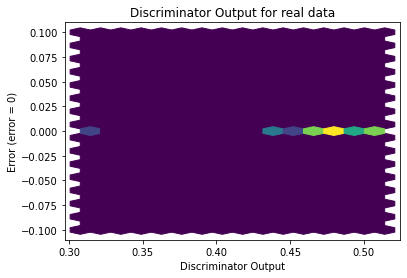

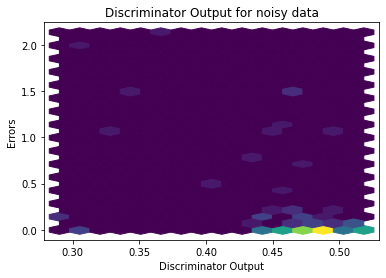

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


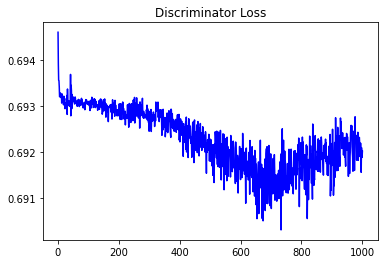

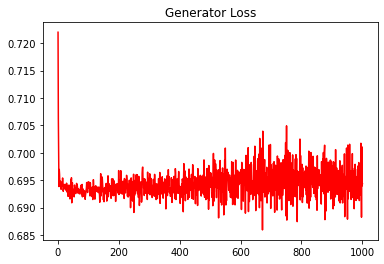

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.26273297494503967


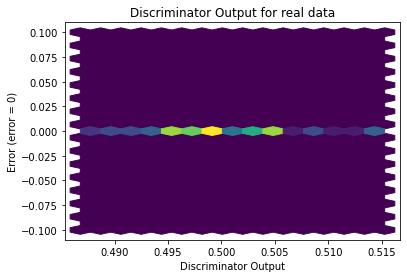

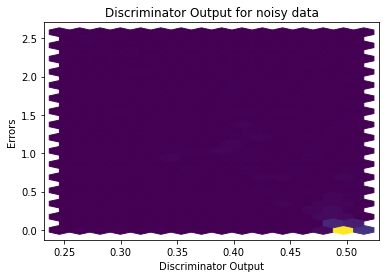

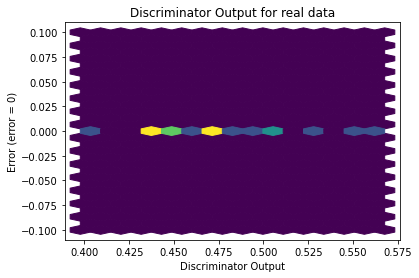

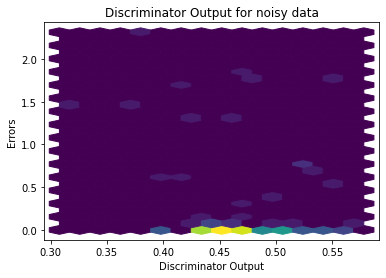

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2653]], requires_grad=True)
